# 4D Air Temperature Anomaly

This turorial illustrates using VCS and DV3D (two CDAT tools) to plot three dimensional air temperature anomaly data through time (the 4th dimension).

[Download the Jupyter Notebook](https://cdat.llnl.gov/Jupyter-notebooks/scientific/4D_Air_Temperature_Anomaly/4D_Air_Temp_Anomaly.ipynb)

[Download the Python file](https://cdat.llnl.gov/Jupyter-notebooks/scientific/4D_Air_Temperature_Anomaly/4D_Air_Temp_Anomaly.py)

The CDAT software was developed by LLNL and this notebook was created and the example code was updated on June 27, 2019. This work was performed under the auspices of the U.S. Department of Energy by Lawrence Livermore National Laboratory under Contract DE-AC52-07NA27344.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1">Getting Started</a></span><ul class="toc-item"><li><span><a href="#Conda-Installation" data-toc-modified-id="Conda-Installation-1.1">Conda Installation</a></span></li><li><span><a href="#Create-CDAT-Compatible-Environment" data-toc-modified-id="Create-CDAT-Compatible-Environment-1.2">Create CDAT Compatible Environment</a></span><ul class="toc-item"><li><span><a href="#For-CDAT:" data-toc-modified-id="For-CDAT:-1.2.1">For CDAT:</a></span></li><li><span><a href="#For-VCDAT-and-the-jupyter-vcdat-environment:" data-toc-modified-id="For-VCDAT-and-the-jupyter-vcdat-environment:-1.2.2">For VCDAT and the jupyter-vcdat environment:</a></span></li></ul></li><li><span><a href="#Start-JupyterLab" data-toc-modified-id="Start-JupyterLab-1.3">Start JupyterLab</a></span></li></ul></li><li><span><a href="#To-Interact-with-the-3D-image..." data-toc-modified-id="To-Interact-with-the-3D-image...-2">To Interact with the 3D image...</a></span></li><li><span><a href="#Import-the-Necessary-Python-Modules" data-toc-modified-id="Import-the-Necessary-Python-Modules-3">Import the Necessary Python Modules</a></span></li><li><span><a href="#Get-the-Tutorial-Data" data-toc-modified-id="Get-the-Tutorial-Data-4">Get the Tutorial Data</a></span></li><li><span><a href="#Open-the-sample-data-file" data-toc-modified-id="Open-the-sample-data-file-5">Open the sample data file</a></span></li><li><span><a href="#Initialize-the-VCS-canvas" data-toc-modified-id="Initialize-the-VCS-canvas-6">Initialize the VCS canvas</a></span></li><li><span><a href="#Set-DV3D-settings" data-toc-modified-id="Set-DV3D-settings-7">Set DV3D settings</a></span><ul class="toc-item"><li><span><a href="#Choose-variable-to-plot" data-toc-modified-id="Choose-variable-to-plot-7.1">Choose variable to plot</a></span></li><li><span><a href="#Calculate-Average/Mean-Temperature" data-toc-modified-id="Calculate-Average/Mean-Temperature-7.2">Calculate Average/Mean Temperature</a></span></li><li><span><a href="#Create-Matricies-Needed-to-Calculate-the-Temperature-Anomaly" data-toc-modified-id="Create-Matricies-Needed-to-Calculate-the-Temperature-Anomaly-7.3">Create Matricies Needed to Calculate the Temperature Anomaly</a></span></li><li><span><a href="#Calculate-3D-Temperature-Anomaly" data-toc-modified-id="Calculate-3D-Temperature-Anomaly-7.4">Calculate 3D Temperature Anomaly</a></span></li></ul></li><li><span><a href="#Create-the-3D-plot" data-toc-modified-id="Create-the-3D-plot-8">Create the 3D plot</a></span></li><li><span><a href="#Create-the-Animation" data-toc-modified-id="Create-the-Animation-9">Create the Animation</a></span></li></ul></div>

## Getting Started

This notebook uses Python 3. 

If you only have Python 2 installed, the code *should* still work in Python 2, but if it doesn't, isn't this a good time to join the Python 3 crowd? The instructions below make it relatively painless to install a Python 3 environment. 

For the code in this notebook or the stand-alone python script to work, you need to install a **CDAT compatible environment**. See the next cell in the notebook for details on how to create an appropriate environment and activate it. If you see three grey dots, that cell has been hidden. Just click on the dots to see the contents of the cell. (To hide the cell, click on the vertical blue bar to the left of the cell in JupyterLab.)

### Conda Installation
We recommend using conda to install and manage environments. Conda itself can be installed either via [Anaconda](https://www.anaconda.com/) (the everything-but-the-kitchen-sink version) or [Miniconda](https://docs.conda.io/en/latest/miniconda.html) (the minimalist version). 

I prefer Miniconda since it takes up less room on my computer and I don't mind installing the various packages I need when I need them. [Miniconda](https://docs.conda.io/en/latest/miniconda.html) (or [Anaconda](https://docs.anaconda.com/anaconda/install/)) will install Python on your computer. If you already have Python installed on your computer, see [this helpful page](https://docs.conda.io/projects/continuumio-conda/en/latest/user-guide/install/index.html#installing-conda-on-a-system-that-has-other-python-installations-or-packages). The choice of whether to install the Python 2.x or Python 3.x version of Miniconda will affect only your root environment. You can create both Python 2.x and Python 3.x environments with either version of Miniconda installed.

When installing Miniconda or Anaconda, let the installer add the conda installation of Python to your PATH environment variable. On a Mac or Linux machine, if asked "Do you wish the installer to initialize Anaconda3 by running conda init?" or something similar, we recommend saying "yes". For more details see [this page](https://docs.anaconda.com/anaconda/user-guide/faq/#installing-anaconda).


### Create CDAT Compatible Environment
Once you have a version of Miniconda (or Anaconda) installed, create a CDAT or Jupyter-VCDAT environment.

#### For CDAT:
1. type the following at a command line prompt:

```
conda create -n cdat81 -c cdat/label/v81 -c conda-forge python=3.6 cdat
```

2. Once the cdat81 environment is installed, activate it by typing:

```
conda activate cdat81
```


3. [Install JupyterLab](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) within your cdat81 environment so you can run Jupyter notebooks:

```
conda install -c conda-forge jupyterlab
```

For additional details on creating a CDAT environment, see the following CDAT [installation](https://github.com/CDAT/cdat/wiki/install) page.

#### For VCDAT and the jupyter-vcdat environment:
1. Follow these instructions [these instructions](https://github.com/CDAT/jupyter-vcdat/wiki/Deploy#from-source) for installing VCDAT 2.0 on your personal computer.

2. Once the jupyter-vcdat environment (and VCDAT) have been installed, activate the environment with:

```
conda activate jupyter-vcdat
``` 

Note: if the "conda activate" command does not work, try: 
```
source activate name_of_environment
```

### Start JupyterLab
Once you have a cdat81 or jupyter-vcdat environment activated, navigate to a parent folder that contains this notebook, then type:
```
jupyter-lab
```
Note: you must launch JupyterLab from the highest level folder you want to be able to access. Jupyter can see folders below the directory from which it was launched, but it cannot see directories above its launch directory.

If you do not want to use the enhanced JupyterLab interface, you can run
```
jupyter-notebook
```
to load only the notebook without the JupyterLab interface.

Once JupyterLab (or Jupyter Notebook) has started, you may be asked to pick a Kernel. Choose the generic Python 3 environment or cdat81 or jupyter-vcdat. If you chose the generic Python 3 environment that means Jupyter will use whichever Python environment started the JupyterLab (or Jupyter Notebook) session. Hence it is best to start the JupyterLab session from an environment that contains CDAT.

As a side note, VCDAT and VCS are two different CDAT modules though they have similar acronyms. [VCDAT 2.0](https://vcdat.llnl.gov) helps you visualize, manipulate data and test out code within the JupyterLab interface. [VCS](https://cdat-vcs.readthedocs.io/en/latest/) stands for Visualization Control System which allows scientists to create customized plots and animations.

## To Interact with the 3D image... 
You will ultimately need to run the Python code in this notebook in a command line window, not within this notebook. One possible work flow is:
1. Step through this notebook line by line to make sure everything works (e.g. you are running an environment with the needed packages, the code is working for you with the sample data, etc.).
2. Once everything is working, either use the Python file we've provided above or save this notebook as a Python file by clicking on File (within the JupyterLab interface) > Export Notebook As... > Export Notebook to Executable Script.
3. If you save/export the script from this notebook, you will need to edit the .py file to remove the "#" symbol in front of the x.interact() command at the bottom of the file. (If you download the python script directly, no editing is necessary.)
4. Open a new command line window and activate your favorite CDAT environment (for testing this notebook, we used the [jupyter-vcdat environment after installing VCDAT](https://github.com/CDAT/jupyter-vcdat/wiki/Deploy)). Note: make sure you are using a "regular" version of the packages - NOT the mesalib version - since you will need to view the 3D image in a window that pops up once the Python script has been run and the mesalib version suppresses this pop up window.
5. Navigate to where the Python script is stored and type: 
```
python -i 4D_Air_Temp_Anomaly.py
```
at the prompt. 

A separate window should open where you can adjust the sliders and click on the "Configure" button to access more features of the plot. Click and drag on the center of the plot to change the angle at which you are viewing the data. The X, Y and Z slices are best viewed with the volume plot turned off. You will also likely need to turn off the volume plot to see the surface plot which shows an isosurface of the variable.

To exit the interactive mode, close the window and type control-D within your command line window to fully exit the interactive mode and to get your command prompt back. If control-D does not work, type control-Z.


An alternate work flow is to accomplish all the steps above in a command line window without using JupyterLab or the Jupyter Notebook.

## Import the Necessary Python Modules

In [1]:
import vcs, cdms2, cdutil, genutil, sys

## Get the Tutorial Data
Download many sample data files for all of our notebooks. For this exercise you need the ta_ncep_87-6-88-4.nc sample data file.

In [2]:
vcs.download_sample_data_files()

Downloading: 'BlueMarble.ppm' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/BlueMarble.ppm
Downloading: 'clt.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/clt.nc
Downloading: 'geo.1deg.ctl' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/geo.1deg.ctl
Downloading: 'geo.1deg.gmp' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/geo.1deg.gmp
Downloading: 'geo.1deg.grb' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/geo.1deg.grb
Downloading: 'meshfill.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/meshfill.nc
Downloading: 'navy_land.nc' from 'https://cd

Downloading: 'tas_cru_1979.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/tas_cru_1979.nc
Downloading: 'psl_6h.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/psl_6h.nc
Downloading: 'ts_da.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/ts_da.nc
Downloading: 'tas_mo.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/tas_mo.nc
Downloading: 'tas_mo_clim.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/tas_mo_clim.nc
Downloading: 'tas_6h.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/jupyter-vcdat/share/cdat/sample_data/tas_6h.nc
Downloading: 'th_yr.nc' from 'https://cdat.llnl.go

## Open the sample data file

In [3]:
f=cdms2.open(vcs.sample_data+"/ta_ncep_87-6-88-4.nc")

## Initialize the VCS canvas
In this example the VCS canvas is called x.

In [4]:
x = vcs.init()

## Set DV3D settings
Choose various DV3D settings for the type of plot you want to make.

Get the data in a scalar format, as opposed to vector format (i.e. this data is scalar data, not vector data).

In [5]:
dv3d = vcs.get3d_scalar()

This plot will be a volume plot.

In [6]:
dv3d.ToggleVolumePlot = vcs.on

Set the camera position for the initial point of view.

In [7]:
dv3d.Camera={'Position': (-161, -171, 279), 'ViewUp': (.29, 0.67, 0.68), 'FocalPoint': (146.7, 8.5, -28.6)}

### Choose variable to plot
Select the 3D air temperature (ta) variable from the open ta_ncep_87-6-88-4.nc file (f) and assign to the v0 variable. The Air Temperature is in degrees Kelvin (K).
Outputting the shape of v0 tells use the dimensions of the matrix which is important for future steps. Here the data should have 11 time steps, 17 vertical levels above the ground, 73 latitude entries (data at every 2.5 degrees of latitude from -90 to 90 degrees), and 144 longitude entries (data at every 2.5 degrees of longidude from -180 to 180 or 0 to 360 depending on how you want to denote longitude).

In [8]:
v0 = f["ta"]
v0.shape

(11, 17, 73, 144)

### Calculate Average/Mean Temperature
Average the temperature of the 3D data, v0, over the x axis (latitude) and assign to the variable, va. We need the average in order to determine the temperature anomaly, i.e. how much each temperature value differs from the mean or average temperature of the dataset.
Printing out the shape of the va matrix shows that it does not have data in the longitude dimension (i.e. the matrix dimensions are (11, 17, 73) not (11, 17, 73, 144)).

In [9]:
va = cdutil.averager( v0, axis='x' )
va.shape

(11, 17, 73)

### Create Matricies Needed to Calculate the Temperature Anomaly
Now that we have the average we need to subtract it from each data value to get the temperature anomaly, but in order to do that, the original data (v0) and the average (va) need to be in matrcies of the same size. The grower method accomplishes that task and creates two matricies of the same size, one for the temperature values based on the original data (v01) and the other for the average temperature for the data set (va1).

In [10]:
v01,va1=genutil.grower(v0,va)

In [11]:
v01.shape

(11, 17, 73, 144)

In [12]:
va1.shape

(11, 17, 73, 144)

### Calculate 3D Temperature Anomaly
With two matricies the same size, we can now subtract the average or mean temperature matrix, va1, from the original temperature data, v01, to get the temperature anomaly matrix, v, which will be plotted.

In [13]:
v = v01 - va1
v.shape

(11, 17, 73, 144)

In [14]:
vcs.minmax(v)

(-26.6138780381944, 23.565077039930657)

Modify the ScaleColormap to cover the min and max values of the data. If you'd like the program to create the plot based on the data without your specifying the temperature range the ScaleColormap and ScaleTransferFunction methods should use, comment out the following three lines of code as we have done here.

In [15]:
#dv3d.VerticalScaling = 4.0 
#dv3d.ScaleColormap = [-27.0, 24.0, 1]
#dv3d.ScaleTransferFunction =  [-27.0, 24.0, 1]

## Create the 3D plot

The next two lines of code are useful if you want to test that the plotting capability is working without creating a full sequence of .png files or the animation at the end. They are intended to be used when stepping through the notebook or python code one line at a time after the "#" is removed to turn them into lines of code instead of comments.

In [16]:
#x.plot( v, dv3d )

In [17]:
#x.png("air_temp_anomaly_t_1.png")

The following lines of code create a .png for each time slice. 

Due to a bug (as of 6/27/19), we need to loop through the first two time slices a second time so the sliders are not shown on the .pngs for these images, hence the additional [0,1] when specifying the range of the loop.

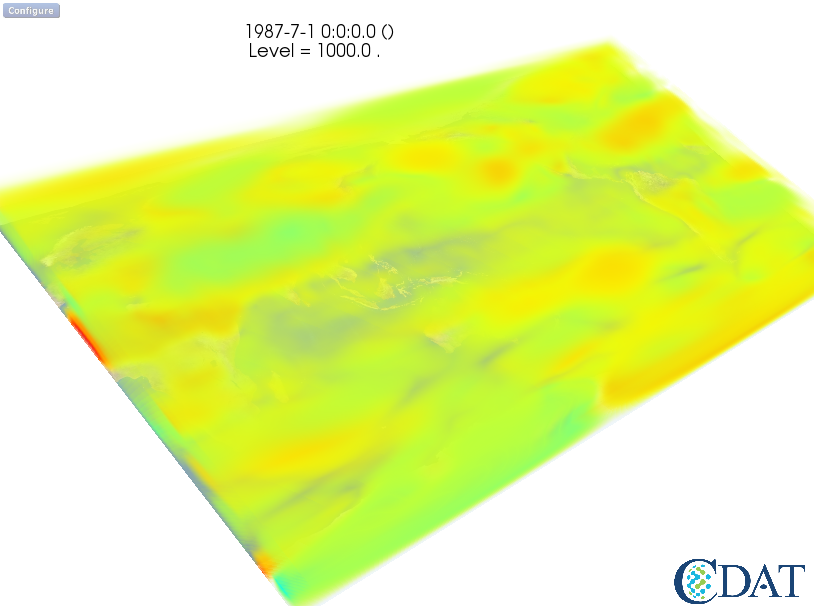

In [18]:
tc = v.getTime().asComponentTime()
for i in list(range(len(v.getTime())))+[0,1]: # due to a bug, we need to loop through i=0 and i=1 a second time 
    print("Time slice",i)
    data = v[i]*1.
    data.id = str(tc[i]) # assigns the time to the id attribute so it can be printed at the top of each .png
    d = x.plot( data, dv3d )
    x.png("anomaly_time_{:03d}".format(i))
d

## Create the Animation

In [19]:
import glob
pngs = sorted(glob.glob("anomaly_time_*.png"))
x.ffmpeg("anomaly_animation.mp4", pngs, bitrate=1024, rate=None, options=None)

If you want to save a python script from this notebook to run outside the notebook (so you can interact with the 3D plot), save the script then delete the "#" in the line above to turn it from a comment to an active line of code.

In [20]:
# x.interact()